First, Tensorflow must be installed:
- Open an Anaconda Prompt (Start Menu -> Anaconda3 -> Anaconda Prompt)
- pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize(X):
    m = np.mean(X)
    standard_deviation = np.std(X)

    return (X - m) / standard_deviation

# Regression

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


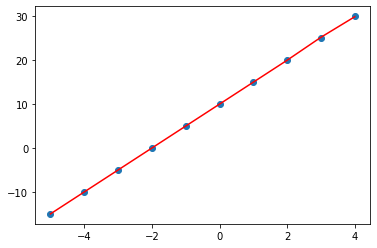

In [3]:
# Regression with linear function (ca. 2s to train)
m = 10
X = np.arange(-m / 2, m / 2).reshape(1, m)
Y = 5 * (X - 10) + 60# + 10 * (np.random.rand(1, m) - 0.5)

X_norm = normalize(X)
Y_norm = normalize(Y)

model = keras.Sequential([keras.layers.Dense(units = 2, activation = 'relu', input_shape = [1]),
                          keras.layers.Dense(units = 1)])
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.12), loss = 'mean_squared_error')
model.fit(X_norm[0], Y_norm[0], epochs = 100, verbose = 0)

model.summary()
Y_hat_norm = model.predict(X_norm[0]).reshape(1, m)

mean_Y = np.mean(Y)
sd_Y = np.std(Y)
Y_hat = sd_Y * Y_hat_norm + mean_Y

plt.plot(X[0], Y[0], "o")
plt.plot(X[0], Y_hat[0], "r-")
plt.show()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


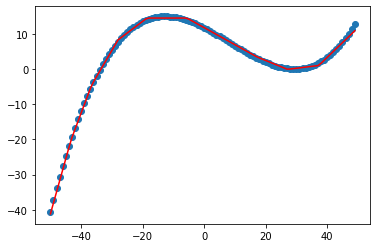

In [4]:
# Regression with non-linear function (ca. 19s to train)
m = 100
X = np.arange(-m / 2, m / 2).reshape(1, m)
Y = 0.0004 * (X - 25) ** 3 + 0.02 * (X - 30) ** 2# + 10 * (np.random.rand(1, m) - 0.5)

X_norm = normalize(X)
Y_norm = normalize(Y)

model = keras.Sequential([keras.layers.Dense(units = 5, activation = 'relu', input_shape = [1]),
                          keras.layers.Dense(units = 5, activation = 'relu'),
                          keras.layers.Dense(units = 5, activation = 'relu'),
                          keras.layers.Dense(units = 1)])
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.025), loss = 'mean_squared_error')
model.fit(X_norm[0], Y_norm[0], epochs = 3000, verbose = 0)

model.summary()
Y_hat_norm = model.predict(X_norm[0]).reshape(1, m)

mean_Y = np.mean(Y)
sd_Y = np.std(Y)
Y_hat = sd_Y * Y_hat_norm + mean_Y

plt.plot(X[0], Y[0], "o")
plt.plot(X[0], Y_hat[0], "r-")
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________

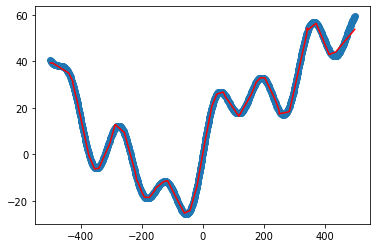

In [5]:
# Regression with very wiggly function (ca. 28 mins to train)
m = 1000
X = np.arange(-m / 2, m / 2).reshape(1, m)
Y = 0.0002 * X ** 2 + 10 * np.sin(X / 25) + 10 * np.sin(X / 50) + 10 * np.sin(X / 100) + 10 * np.sin(X / 200) + 10 * np.sin(X / 400)# + 10 * (np.random.rand(1, m) - 0.5)

X_norm = normalize(X)
Y_norm = normalize(Y)

model = keras.Sequential([keras.layers.Dense(units = 10, activation = 'relu', input_shape = [1]),
                          keras.layers.Dense(units = 10, activation = 'relu'),
                          keras.layers.Dense(units = 10, activation = 'relu'),
                          keras.layers.Dense(units = 10, activation = 'relu'),
                          keras.layers.Dense(units = 10, activation = 'relu'),
                          keras.layers.Dense(units = 1)])
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = 'mean_squared_error')
model.fit(X_norm[0], Y_norm[0], epochs = 30000, verbose = 0)

model.summary()
Y_hat_norm = model.predict(X_norm[0]).reshape(1, m)

mean_Y = np.mean(Y)
sd_Y = np.std(Y)
Y_hat = sd_Y * Y_hat_norm + mean_Y

plt.plot(X[0], Y[0], "o")
plt.plot(X[0], Y_hat[0], "r-")
plt.show()